In [1]:
import pandas as pd
from random import randint
import warnings
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve, roc_auc_score, classification_report
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [2]:
#Extraemos los datos del csv
df = pd.read_csv("data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Quitamos la columna de id porque no tiene aporte al modelo
df = df.drop("id", 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Cambiamos la variable dependiente categórica a numérica
labelencoder = LabelEncoder()
df["diagnosis"] = labelencoder.fit_transform(df["diagnosis"])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
#Seleccionamos la variable dependiente
y = df.iloc[:, 0].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [6]:
#Seleccionamos las variables independientes
X = df.iloc[:, 1:-1].values
X


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
#Hacemos el split de data de entrenamiento y data de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
#Realizamos una estandarización de los datos independientes (promedio = 0, varianza = 1)
scaler = StandardScaler()
scaler.fit(X_train)

#Almacenamos las variables de los datos independientes por si las necesitamos luego
X_train2 = X_train
X_test2 = X_test

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
#Realizamos una reducción de dimensiones en la data independiente con PCA
pca = PCA(0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [10]:
#Creamos los modelos a comparar
models = []
results = []
names = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

In [11]:
#Creamos un listado con los posibles hiperparámetros para realizar Grid search de cada modelo
parameters = []

parameters.append({'LR__C':[1, 10, 100],
                    'LR__penalty':['l1', 'l2']})
parameters.append({"LDA__solver":["svd", "lsqr", "eigen"],
                   "LDA__shrinkage":[None, "auto"]})
parameters.append({'KNN__n_neighbors':[3,4,5,6,7]})
parameters.append({"CART__max_depth": [3,5,7, None],
              "CART__max_features": [randint(1, 9)],
              "CART__min_samples_leaf": [randint(1, 9)],
              "CART__criterion": ["gini", "entropy"]})
parameters.append({"RF__max_depth": [3,5,7, None],
              "RF__max_features": [randint(1, 9)],
              "RF__min_samples_leaf": [randint(1, 9)],
              "RF__criterion": ["gini", "entropy"],
              "RF__n_estimators": [100, 1000, 5000]})
parameters.append({})
parameters.append({'SVM__C':[1, 10, 100],
                    'SVM__gamma':[0.1,0.01, 0.001]})

In [12]:
#Realizamos el pipeline para afinar los hiperparámetros con grid search
warnings.filterwarnings('ignore')
aux = 0
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name, model)])
    param = parameters[aux]
    cv = GridSearchCV(pipeline, param_grid=param)
    cv.fit(X_train2, y_train)
    y_pred = cv.predict(X_test2)

    print("{} - Classification Report: \n".format(name), classification_report(y_test, y_pred))
    print("Best Parameters: %s"%cv.best_params_)
    print("Best Accuracy: %.4f"%cv.best_score_)
    print("Test Accuracy: %.4f"%cv.score(X_test2, y_test))
    print("---------------------------------------------------------------------------------------\n\n")
    aux += 1

LR - Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Best Parameters: {'LR__C': 1, 'LR__penalty': 'l2'}
Best Accuracy: 0.9670
Test Accuracy: 0.9737
---------------------------------------------------------------------------------------


LDA - Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Best Parameters: {'LDA__shrinkage': None, 'LDA__solver': 'svd'}
Best Accuracy: 0.9538
Test Accuracy:

In [13]:
#Creamos los modelos con los hiperparametros afinados
models2 = []
models2.append(('LR', LogisticRegression(C=1, penalty='l2', random_state=1)))
models2.append(('LDA', LinearDiscriminantAnalysis(shrinkage=None, solver='svd')))
models2.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models2.append(('CART', DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=8, min_samples_leaf=1, random_state=1)))
models2.append(('RF', RandomForestClassifier(criterion='entropy', max_depth=None, max_features=8, min_samples_leaf=3, n_estimators=100, random_state=1)))
models2.append(('NB', GaussianNB()))
models2.append(('SVM', SVC(C=100, gamma=0.001, random_state=1)))
models2

[('LR', LogisticRegression(C=1, random_state=1)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier(n_neighbors=3)),
 ('CART',
  DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=8,
                         random_state=1)),
 ('RF',
  RandomForestClassifier(criterion='entropy', max_features=8, min_samples_leaf=3,
                         random_state=1)),
 ('NB', GaussianNB()),
 ('SVM', SVC(C=100, gamma=0.001, random_state=1))]

In [14]:
warnings.filterwarnings('ignore')
#Realizamos un crpss validation de todos los modelos
for name, model in models2:
    kfold = KFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.935025 (0.035079)
LDA: 0.959555 (0.029449)
KNN: 0.922682 (0.050952)
CART: 0.942074 (0.032358)
RF: 0.963095 (0.016545)
NB: 0.936779 (0.036077)
SVM: 0.906798 (0.027482)


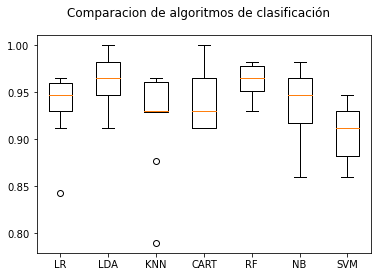

In [15]:
# Comparamos los metodos con un box-plot
fig = pyplot.figure()
fig.suptitle('Comparacion de algoritmos de clasificación')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [16]:
#Creamos el modelo de RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [17]:
#Creamos una matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  2],
       [ 3, 39]], dtype=int64)

In [18]:
#Obtenemos un puntaje de precisión
accuracy_score(y_test, y_pred)

0.956140350877193

Text(0.5, 1.0, 'Benchmarking between ROCs & AUCs')

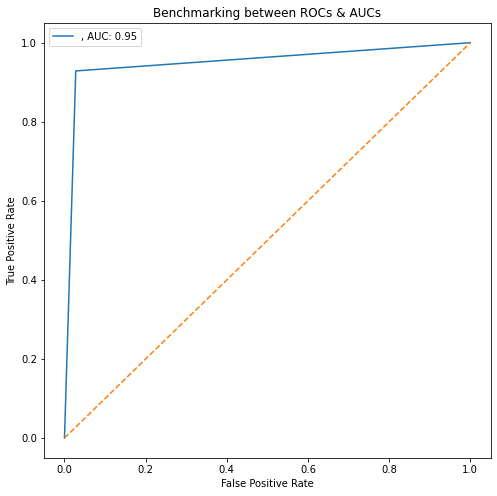

In [19]:
#Realizamos un benchmark entre la curva roc y auc

plt.rcParams['figure.figsize'] = (8,8)

fpr,tpr,_ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,label=str(", AUC: %.2f"%auc(fpr,tpr)))

plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Benchmarking between ROCs & AUCs')

